# Historical Stock Market Data Analysis

## About the dataset

A comprehensive dataset of historical daily stock prices for all tickers actively traded on NASDAQ as of July 2020, sourced through the yfinance Python package and compiled from Yahoo Finance data. Each ticker's data is organised in CSV files that cover essential daily trading metrics, including the opening, high, low, closing, and adjusted closing prices, as well as trading volumes.

Each ticker is saved under its symbol name in either an "ETFs" or "Stocks" folder, distinguishing between asset types. Additionally, a metadata file, symbols_valid_meta.csv, enhances the dataset with each ticker's full name and further descriptive details, providing a solid foundation for in-depth analysis and financial insights.

## Data Objectives

In this project, we will focus on the data of the Google Stock.

5 Key questions: 
1. What is the average daily trading volume for the Google stock?
2. What is the overall trend of Google's closing price over time?
3. How volatile has the stock been over the last recorded year?
4. Which stocks had the highest and lowest daily returns over the dataset’s time period?
5. Did the stock experience a “crash” (a drop of 10% or more) in a single day? If so, list the dates this occurred.

## Data Collection

In [7]:
# import the data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub
from datetime import datetime

# Download latest version of the dataset and filepath
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")

In [8]:
# Load Dataset
stocks_full_path = os.path.join(path, 'stocks', 'GOOG.csv')
df = pd.read_csv(stocks_full_path)
# Check if dataframe loads
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


## Exploratory Data Analysis

### DataFrame Structure and Types

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3932 non-null   object 
 1   Open       3932 non-null   float64
 2   High       3932 non-null   float64
 3   Low        3932 non-null   float64
 4   Close      3932 non-null   float64
 5   Adj Close  3932 non-null   float64
 6   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 215.2+ KB


,Open,High,Low,Close,Adj Close,Volume
count,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3.932000e+03
mean,503.492910,508.124859,498.663314,503.527215,503.527215,7.012622e+06
std,353.268069,356.317978,350.437807,353.588886,353.588886,8.037743e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.900000e+03
25%,238.583237,240.514744,235.593189,237.568283,237.568283,1.756925e+06
50%,326.080276,330.324371,322.907166,326.172424,326.172424,4.305100e+06
75%,737.595016,742.867493,731.997513,738.472488,738.472488,8.956550e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,8.254150e+07


In [12]:
max_vol = df['Volume'].max()
print(max_vol)

82541500


In [13]:
index = df[df['Volume'] == max_vol].index
print(index)
print(df.iloc[358])

Index([358], dtype='int64')
Date         2006-01-20
Open         218.530899
High         219.193405
Low          196.632965
Close        198.984161
Adj Close    198.984161
Volume         82541500
Name: 358, dtype: object


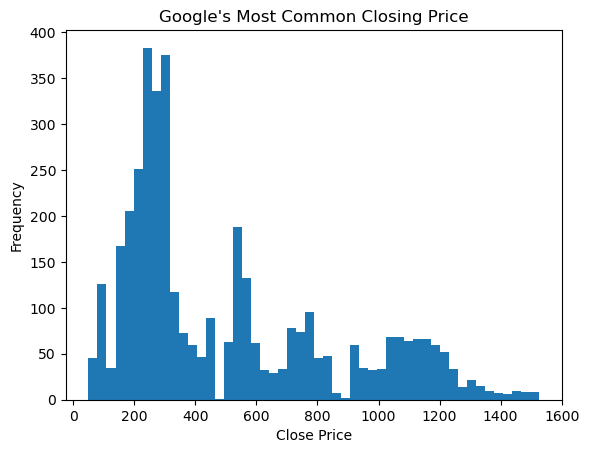

In [14]:
x = df['Close']
plt.hist(x, bins=50)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title("Google's Most Common Closing Price")
plt.show()

## 1. Average daily trading volume for the Google stock

In [16]:
# Create a series for the volume column
volume_data = df['Volume']
print(volume_data)
print(type(volume_data))

0       44871300
1       22942800
2       18342800
3       15319700
4        9232100
          ...   
3927     3571700
3928     3208500
3929     2574100
3930     2486400
3931     2343100
Name: Volume, Length: 3932, dtype: int64
<class 'pandas.core.series.Series'>


In [17]:
average_vol = np.mean(volume_data)
print(f"The average daily trading volume of Google is {average_vol:.2f}")

The average daily trading volume of Google is 7012621.52


## 2. The overall trend of Google's closing price over time

In [19]:
# Plotting trend as Time Series
# Convert date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])
# Get unique year values
years = df['Date'].dt.year.unique()
print(years)

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [20]:
# Group the average close values by the years
closing_highs = df.groupby(df['Date'].dt.year)['Close'].mean()
print(closing_highs)

Date
2004      75.617206
2005     138.360933
2006     204.824916
2007     268.369305
2008     231.558071
2009     219.023214
2010     266.811472
2011     283.424738
2012     320.208021
2013     440.470378
2014     559.803290
2015     602.005681
2016     743.486707
2017     921.780837
2018    1113.225134
2019    1188.393057
2020    1352.986028
Name: Close, dtype: float64


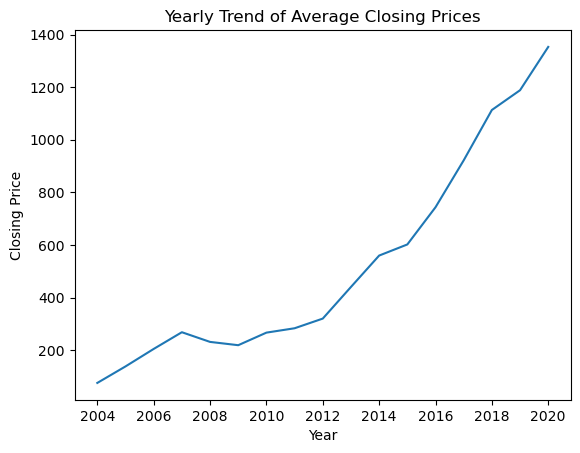

In [21]:
# Plot with the years using time series manipulation
x = years
y = closing_highs
# plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Yearly Trend of Average Closing Prices")
plt.show()

## 3. How volatile has the stock been over the last recorded year?

In [23]:
# Isolate close column where year is 2020
close2020 = df[df['Date'].dt.year == 2020]['Close']
# Calculate standard deviation using numpy
std_close2020 = np.std(close2020)
print(std_close2020)

147.34178990025367


For pandas to performed the same as numpy, you can pass in the ddof=0 parameter, so df.std(ddof=0).

In [25]:
# The standard deviation of the closing prices for all years
closing_std = df.groupby(df['Date'].dt.year)['Close'].std(ddof=0)
print(closing_std)

Date
2004     16.158638
2005     38.039705
2006     21.033527
2007     41.081265
2008     49.921679
2009     44.357210
2010     25.086220
2011     21.299588
2012     26.314019
2013     49.081615
2014     25.845099
2015     81.563429
2016     34.387325
2017     77.078558
2018     67.181320
2019     81.602989
2020    147.341790
Name: Close, dtype: float64


The value of 147 as a standard deviation suggests that data points in this dataset typically vary by ±147 units from the mean. The larger this number, the more spread out the data is.

## 4. Which stocks had the highest and lowest daily returns over the dataset’s time period?

daily returns = (today's close - yesterday's close)/yestarday's close

In [29]:
# Get yesterday's closing
df['today_close'] = df['Close']
df['yest_close'] = df['Close'].shift(1)

# Calculate the daily returns 
df['daily_return'] = (df['today_close'] - df['yest_close']) / df['yest_close']
# print(df['daily_return'])

# Find the day with the max value
print(f"The highest daily return was {(df['daily_return'].max()*100):.2f}%")
# Find the day with the min value
print(f"The lowest daily return was {(df['daily_return'].min()*100):.2f}%")

The highest daily return was 19.99%
The lowest daily return was -11.61%


In [30]:
# Find the days with highest and lowest return
max_day = df.loc[df['daily_return'] == df['daily_return'].max()]['Date']
min_day = df.loc[df['daily_return'] == df['daily_return'].min()]['Date']
print(max_day) 
print(min_day)

922   2008-04-18
Name: Date, dtype: datetime64[ns]
1035   2008-09-29
Name: Date, dtype: datetime64[ns]


## 5.Did the stock experience a “crash” (a drop of 10% or more) in a single day? If so, list the dates this occurred.

In [32]:
the_days = df[df['daily_return']>=0.1]['Date']
days_amount = df[df['daily_return']>=0.1]['Date'].count()
crash_days = df[df['daily_return']>=0.1]['Date']   # add .tolist() if you want to convert to list form
df[df['daily_return']>=0.1]
print(f"The were {days_amount} days where the stock experienced a crash. These days were:")
for day in the_days:
    print(day)

The were 10 days where the stock experienced a crash. These days were:
2004-10-22 00:00:00
2005-10-21 00:00:00
2008-04-18 00:00:00
2008-10-13 00:00:00
2008-10-28 00:00:00
2010-10-15 00:00:00
2011-07-15 00:00:00
2013-10-18 00:00:00
2015-07-17 00:00:00
2019-07-26 00:00:00


In [33]:
# Checking all the values add to all the rows using non-null column
print("There are " + str(df.shape[0]) + " rows")
non_crash = df[df['daily_return']<=0.1]['Date'].count()
null_rows = df[df['daily_return'].isna()]['Date'].count()
print(f"There are {crash_days.count()} rows where the stock crashed, {non_crash} where the stock didn't crash and {null_rows} row missing due to a null value.")

There are 3932 rows
There are 10 rows where the stock crashed, 3921 where the stock didn't crash and 1 row missing due to a null value.
